### Sprint #2: Data

DS4003 | Spring 2024

The objective of this sprint is to locate suitable data for the term project and then clean and prepare this data using the pandas library in Python. This will ensure the data is ready for subsequent analysis and visualization steps. Additionally you will list ideas for UI components and possible data visualizations to build.

**Instructions**

1. Research and find a suitable dataset for your term project. The dataset should be rich enough to allow for interesting analysis and visualizations.

2. Once you have located your dataset, download it and import it into a Python environment in Jupyter Notebook.

3. The first section of your notebook should include why you chose this data and data provenance.

4. Use the pandas library to clean and prepare your data. This may include dealing with missing values, converting data types, or restructuring the data as necessary. By the end your data should be ‘tidy’ data. Links to an external site.

5. After your data is cleaned, complete an exploratory analysis of your data. Depending on your data, this may include things like:

- How many observations do you have?
- How many unique categories are there for categorical variables?
- How much missing data is there per observation or per variable?
- What are the distributions of continuous variables? Are there outliers?

6. At the end of your data exploration, include a data dictionary.

7. Finally, brainstorm a list of UI components that you could include in your dashboard. Consider what would be most useful or interesting for users.

8. Also brainstorm a list 3-6 possible data visualizations (e.g., a scatter plot of sepal length vs sepal width - this could be filtered on species using a multi-select dropdown)

**Deliverables**

In a GitHub Repo:

- Your cleaned and prepared dataset in a csv file called data.csv
- In a single Jupyter Notebook:
   - Your exploratory analysis, including code and commentary
   - A list of potential UI components for your dashboard
   - A list of potential data visualizations for your dashboard

### Data Provenance and Explanation

My interactive dashboard is meant to be a way to track carbon dioxide (CO2) by country by its primary ways of being released into the atmosphere via fossil fuels over a period of time. Carbon dioxide is a greenhouse that traps heat in the earth's atmosphere contributing to global warming and climate change. With carbon dioxide concentrations inceasing rapidly and the temperature alarmingly rising, I think that it is important to understand who and what the most significant contributers are. The data selected is was published by researchers from the Center for International Climate Research (CICERO) using the most recent 2023 release of the Global Carbon Project (GCP) fossil emissions dataset.

### Data Wrangling/EDA

In [1]:
# install dependencies
import pandas as pd
import numpy as np

In [2]:
# load the recipes dataset 
df = pd.read_csv('globalco2emissions.csv')

In [3]:
# display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61425 entries, 0 to 61424
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             61425 non-null  object 
 1   ISO 3166-1 alpha-3  60333 non-null  object 
 2   UN M49              61425 non-null  int64  
 3   Year                61425 non-null  int64  
 4   Total               23172 non-null  float64
 5   Coal                22955 non-null  float64
 6   Oil                 21770 non-null  float64
 7   Gas                 21742 non-null  float64
 8   Cement              23541 non-null  float64
 9   Flaring             21651 non-null  float64
 10  Other               1813 non-null   float64
 11  Per Capita          17543 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 5.6+ MB


In [4]:
# count the total number of missing values in the entire dataset
total_missing = df.isna().sum().sum()
print(total_missing)

338305


In [5]:
# display first 5 rows
df.head(5)

,Country,ISO 3166-1 alpha-3,UN M49,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,4,1750,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,4,1751,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,Afghanistan,AFG,4,1752,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,Afghanistan,AFG,4,1753,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,Afghanistan,AFG,4,1754,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [6]:
# getting rid of the capitalization in the variables
df = df.rename(columns = {'Country':'country',
                    'ISO 3166-1 alpha-3':'country_code',
                    'Year':'year',
                    'Total':'total',
                    'Coal':'coal',
                    'Oil':'oil',
                    'Gas':'gas',
                    'Cement':'cement',
                    'Flaring':'flaring',
                    'Other':'other',
                    'Per Capita':'per_capita'}) 

The UNM49 column in the dataset is provided by the United Nations for their personal analysis and is thus not needed for the dashboard. The country_code is not needed either as the country/organization it self will be used now that each is listed. The column 'other' severly lacked values so this was deleted as well

In [7]:
# dropping unessecary columns
df.drop(columns='UN M49', inplace=True)
df.drop(columns='country_code', inplace=True)
df.drop(columns='other', inplace=True)

When looking at the dataset, it appears that many of the years prior to 1930 have no recorded or have very bare values (more than likely, many of these values were not collected during this time). Thus, my dataset will start at 1990, and the years prior will be filtered out. The year 1990 is when carbon dioxide emmission rised incredibly.

In [8]:
# filtering out rows prior to 1950
df_updated =  df.loc[(df['year'] < 1750) | (df['year'] > 1989)]

In [9]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'country'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bonaire, Saint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Micronesia (Federated States of)' 'Fiji' 'Finland' 'Panama Canal Zone'
 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany'

In [10]:
# count the total number of missing values for variable
missing_for_variable = df_updated['country'].isna().sum()
print(missing_for_variable)

0


In [11]:
# Only want specific countries not world total or organization
countries_to_drop = ['Global', 'International']
df_updated = df_updated.drop(df_updated[df_updated['country'].isin(countries_to_drop)].index)

In [12]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'year'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022] 

year
1990    224
2007    224
2021    224
2020    224
2019    224
2018    224
2017    224
2016    224
2015    224
2014    224
2013    224
2012    224
2011    224
2010    224
2009    224
2008    224
2006    224
1991    224
2005    224
2004    224
2003    224
2002    224
2001    224
2000    224
1999    224
1998    224
1997    224
1996    224
1995    224
1994    224
1993    224
1992    224
2022    224
Name: count, dtype: int64 



In [13]:
# count the total number of missing values for variable
missing_for_variable = df_updated['year'].isna().sum()
print(missing_for_variable)

0


In [14]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'coal'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

[0.278464 0.249627 0.021984 ... 4.308864 4.548245 5.027008] 

coal
0.000000     3109
0.003664      114
0.007328       39
0.014656       28
0.025648       22
             ... 
23.588832       1
28.062576       1
27.626560       1
29.447568       1
5.027008        1
Name: count, Length: 3196, dtype: int64 



In [15]:
# count the total number of missing values for variable
missing_for_variable = df_updated['coal'].isna().sum()
print(missing_for_variable)

284


Certain variables had NaN values. Many countries  were not established/ did not measure before certain years, so these values were excluded.

In [16]:
# count the total number of missing values for variable
df_updated = df_updated.dropna(subset=['coal'])

In [17]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'total'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

[  2.024326   1.914301   1.482054 ... 268.338935 291.446123 424.853708] 

total
0.010992      51
0.065952      40
0.047632      33
0.007328      29
0.084272      26
              ..
98.621793      1
93.801558      1
89.114955      1
86.963204      1
424.853708     1
Name: count, Length: 5878, dtype: int64 



In [18]:
# count the total number of missing values for variable
missing_for_variable = df_updated['total'].isna().sum()
print(missing_for_variable)

0


In [19]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'oil'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

[  1.271408   1.204085   1.029584 ... 268.338935 291.446123 424.853708] 

oil
0.010992      51
0.065952      40
0.047632      33
0.007328      29
0.084272      28
              ..
2.184027       1
2.161760       1
2.319312       1
2.495184       1
424.853708     1
Name: count, Length: 5110, dtype: int64 



In [20]:
missing_for_variable = df_updated['oil'].isna().sum()
print(missing_for_variable)

0


In [21]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'gas'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

[0.40304  0.389125 0.362736 ... 0.744279 0.777217 0.787201] 

gas
0.000000    3367
0.007328      19
0.003664      17
0.036640      14
0.043968      13
            ... 
1.645493       1
2.848433       1
3.982331       1
3.922968       1
0.787201       1
Name: count, Length: 3399, dtype: int64 



In [22]:
# count the total number of missing values for variable
missing_for_variable = df_updated['gas'].isna().sum()
print(missing_for_variable)

0


In [23]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'cement'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

[0.045766 0.046991 0.0474   ... 0.55799  0.472742 0.530865] 

cement
0.000000    2181
1.555589       7
0.069749       6
0.058124       6
0.116305       6
            ... 
1.328096       1
1.260648       1
0.972707       1
0.735351       1
0.075513       1
Name: count, Length: 4416, dtype: int64 



In [24]:
# count the total number of missing values for variable
missing_for_variable = df_updated['cement'].isna().sum()
print(missing_for_variable)

273


In [25]:
# dropping NaN values
df_updated = df_updated.dropna(subset=['cement'])

In [26]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'flaring'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

[0.025648 0.025697 0.021984 ... 1.639538 1.767968 1.367732] 

flaring
0.000000     3839
0.003664       11
0.021984        9
17.505000       7
0.000005        5
             ... 
2.965912        1
3.003012        1
2.928241        1
2.953859        1
1.367732        1
Name: count, Length: 2859, dtype: int64 



In [27]:
# count the total number of missing values for variable
missing_for_variable = df_updated['flaring'].isna().sum()
print(missing_for_variable)

0


In [28]:
# looking at the variable to find unqiue or missing values; taking a look at each count as well
var = 'per_capita'
print(df_updated[var].unique(),'\n') 
print(df_updated[var].value_counts(), '\n') 

[0.189281 0.178155 0.122916 ... 0.500945 0.524931 0.542658] 

per_capita
0.000000    85
0.396537     2
1.726789     2
1.108959     2
0.088856     2
            ..
1.368356     1
1.628500     1
1.548870     1
1.265765     1
0.542658     1
Name: count, Length: 6746, dtype: int64 



In [29]:
# count the total number of missing values for variable
missing_for_variable = df_updated['per_capita'].isna().sum()
print(missing_for_variable)

0


In [30]:
# gettin info and looking at dataset after cleaning
df_updated.info()
df_updated.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6835 entries, 240 to 61151
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     6835 non-null   object 
 1   year        6835 non-null   int64  
 2   total       6835 non-null   float64
 3   coal        6835 non-null   float64
 4   oil         6835 non-null   float64
 5   gas         6835 non-null   float64
 6   cement      6835 non-null   float64
 7   flaring     6835 non-null   float64
 8   per_capita  6835 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 534.0+ KB


,country,year,total,coal,oil,gas,cement,flaring,per_capita
240,Afghanistan,1990,2.024326,0.278464,1.271408,0.403040,0.045766,0.025648,0.189281
241,Afghanistan,1991,1.914301,0.249627,1.204085,0.389125,0.045766,0.025697,0.178155
242,Afghanistan,1992,1.482054,0.021984,1.029584,0.362736,0.045766,0.021984,0.122916
243,Afghanistan,1993,1.486943,0.018320,1.047904,0.351744,0.046991,0.021984,0.106182
244,Afghanistan,1994,1.453829,0.014693,1.032171,0.337935,0.046991,0.022039,0.094065


In [31]:
# checking missings once more
total_missing = df_updated.isna().sum().sum()
print(total_missing)

0


### EDA

Prior to cleaning, my dataset contained 61425 entries with a total of 12 columns from the years 1750 - 2022. After cleaning, there were 6835 entries and 9 columns in total from the years 1990 - 2022. For categorical variables there are two: country, and the year that groups the carbon dioxde emissions for the country. The discrete variables are the carbon dioxide emissions measured in metric tons for each of the fossil fuel types: coal, oil, and gas, along with flaring operations, cement production and other potential pollutants. The dataset also contains the total from the prior continous variables listed and an additional per_capita continous variable for the country as well. After cleaning there were no missing variables, however, prior to this there were 338305. 'coal' had 284, and 'cement' had 273. The statistics for each variable will be listed below. At first, the data appeared to be very right-skewed, but a log transformation was added for better scaling. Although there is still some skewedness, I do think it is important to keep the outliers as it is important for analysis as some countries produce significant amounts of carbon dioxide for underlying reasons. Their emission data will stand out the most.

In [32]:
# looking summary statistics for the variable
var = 'oil'
print(df_updated[var].describe(),'\n')

count    6835.000000
mean       52.070250
std       194.824504
min         0.000000
25%         0.787760
50%         4.536032
75%        26.447034
max      2642.691825
Name: oil, dtype: float64 



<Axes: >

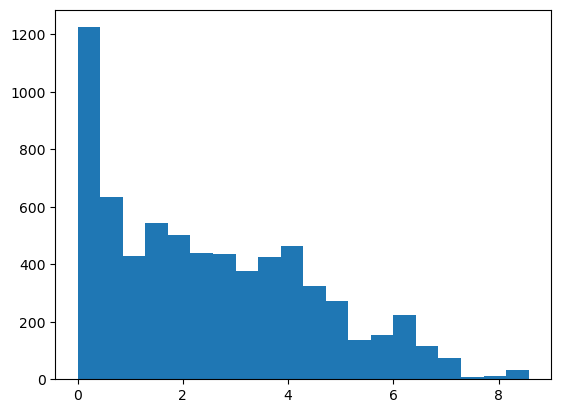

In [33]:
# variable looked heavily skewed, so an arcsinh tranformation was added for better scaling
# this is presented via histogram to look at distrobutions and locate the non-infinte values
df_updated['oil_arc'] = np.arcsinh(df_updated['oil'])
df_updated.loc[df_updated['oil_arc']>0,'oil_arc'].hist(bins=20,grid=False)

In [34]:
# looking summary statistics for the variable
var = 'coal'
print( df_updated[var].describe(),'\n')

count    6835.000000
mean       57.083668
std       405.040692
min         0.000000
25%         0.000000
50%         0.044060
75%         6.722786
max      8250.736658
Name: coal, dtype: float64 



<Axes: >

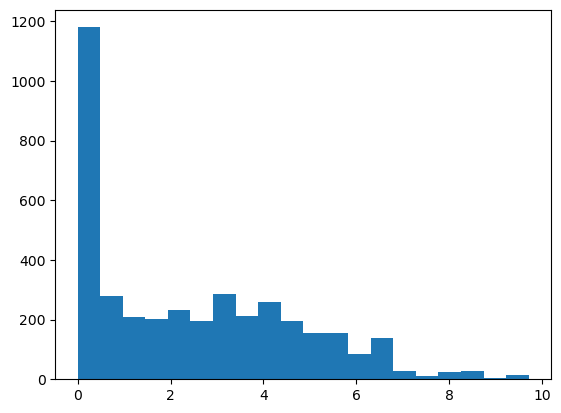

In [35]:
# variable looked heavily skewed, so arcsinh tranformation was added for better scaling
# this is presented via histogram to look at distrobutions and locate the non-infinte values
df_updated['coal_arc'] = np.arcsinh(df_updated['coal'])
df_updated.loc[df_updated['coal_arc']>0,'coal_arc'].hist(bins=20,grid=False)

In [36]:
# looking summary statistics for the variable
var = 'gas'
print(df_updated[var].describe(),'\n')

count    6835.000000
mean       27.280623
std       113.138594
min         0.000000
25%         0.000000
50%         0.047812
75%        11.474505
max      1742.143475
Name: gas, dtype: float64 



<Axes: >

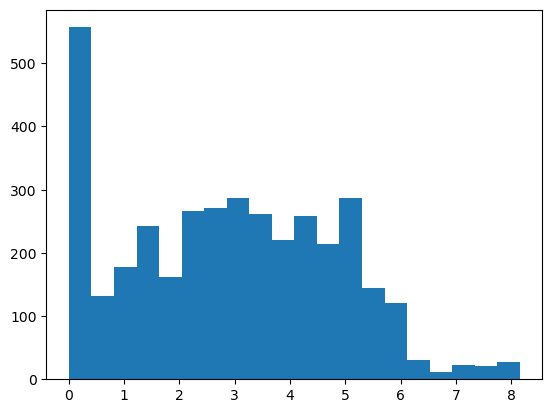

In [37]:
# variable looked heavily skewed, so an arcsinh tranformation was added for better scaling
# this is presented via histogram to look at distrobutions and locate the non-infinte values
df_updated['gas_arc'] = np.arcsinh(df_updated['gas'])
df_updated.loc[df_updated['gas_arc']>0,'gas_arc'].hist(bins=20,grid=False)

In [38]:
# looking summary statistics for the variable
var = 'cement'
print('Before coercion: \n', df_updated[var].describe(),'\n')

Before coercion: 
 count    6835.000000
mean        5.104119
std        38.211750
min         0.000000
25%         0.000000
50%         0.319207
75%         1.741059
max       858.232613
Name: cement, dtype: float64 



<Axes: >

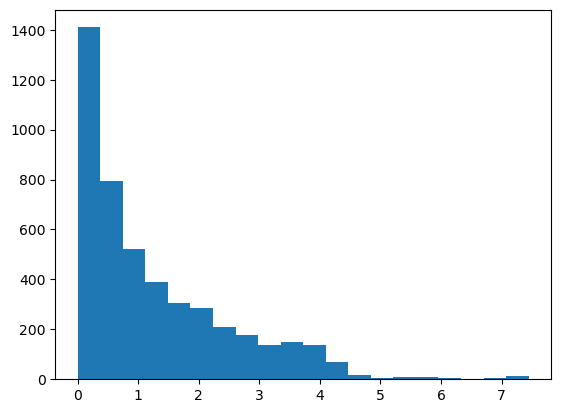

In [39]:
# variable looked heavily skewed, so an arcsinh tranformation was added for better scaling
# this is presented via histogram to look at distrobutions and locate the non-infinte values
df_updated['cement_arc'] = np.arcsinh(df_updated['cement'])
df_updated.loc[df_updated['cement_arc']>0,'cement_arc'].hist(bins=20,grid=False)

In [40]:
# looking summary statistics for the variable
var = 'flaring'
print('Before coercion: \n', df_updated[var].describe(),'\n')

Before coercion: 
 count    6835.000000
mean        1.676202
std         5.857277
min         0.000000
25%         0.000000
50%         0.000000
75%         0.491704
max        88.436967
Name: flaring, dtype: float64 



<Axes: >

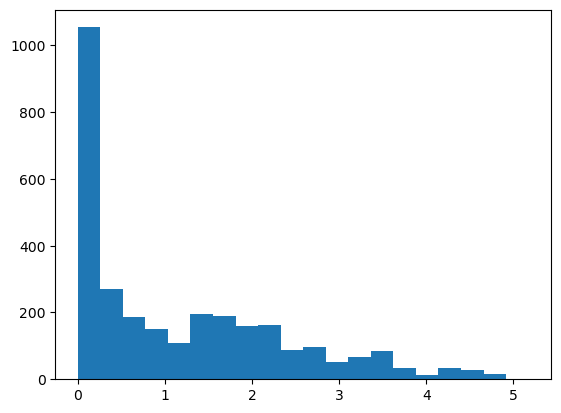

In [41]:
# variable looked heavily skewed, so an arcsinh tranformation was added for better scaling
# this is presented via histogram to look at distrobutions and locate the non-infinte values
df_updated['flaring_arc'] = np.arcsinh(df_updated['flaring'])
df_updated.loc[df_updated['flaring_arc']>0,'flaring_arc'].hist(bins=20,grid=False)

In [42]:
# looking summary statistics for the variable
var = 'per_capita'
print('Before coercion: \n', df_updated[var].describe(),'\n')

Before coercion: 
 count    6835.000000
mean        4.943785
std         6.612741
min         0.000000
25%         0.673975
50%         2.698371
75%         6.892578
max        76.612985
Name: per_capita, dtype: float64 



<Axes: >

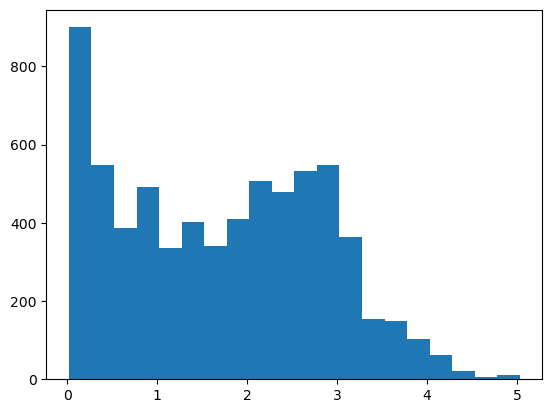

In [43]:
# variable looked heavily skewed, so an arcsinh tranformation was added for better scaling
# this is presented via histogram to look at distrobutions and locate the non-infinte values
df_updated['per_capita_arc'] = np.arcsinh(df_updated['per_capita'])
df_updated.loc[df_updated['per_capita_arc']>0,'per_capita_arc'].hist(bins=20,grid=False)

### Data Dictionary
1. 'country': The name of the country (String) 
2. 'year' : The year of the data (Integer)
3. 'total' : The total amount of CO2 emissions for the country in the given year. (Float)
4. 'coal' : The amount of CO2 emissions from coal for the country in the given year. (Float)
5. 'oil' : The amount of CO2 emissions from oil for the country in the given year. (Float)
6. 'gas' : The amount of CO2 emissions from gas for the country in the given year. (Float)
7. 'cement' : The amount of CO2 emissions from cement production for the country in the given year. (Float)
8. 'flaring' : Flaring: The amount of CO2 emissions from flaring operations for the country in the given year. (Float)
9. 'per_capita' : The amount of CO2 emissions per capita for the country in the given year. (Float)

*I have decided to keep both original and transformed continuous variables above for my interpretability and certain visualizations on my dashboard.*

### UI Components and Visualization Ideas
1. UI Components
    - Dropdown Menus for countries and fossil fuel type
    - Slider for years
    - Text Input for country/year
    - Interactive Tables for emmission type
2. Data Visualizations
    - Pie charts for selected country emissions
    - Heat maps by country
    - Stacked bar chart for each fossil fuel type
    

In [44]:
df_updated.to_csv('data.csv', index=False) 